Based on the Titanic data, we have to classify weather the particular passenger survived or not?

In [24]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.shape

(891, 12)

In [25]:
inputs = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')


In [28]:
inputs= inputs.dropna()
inputs.shape

(714, 5)

In [29]:
target= inputs.Survived
inputs= inputs.drop(['Survived'],axis='columns')
target.shape,inputs.shape

((714,), (714, 4))

In [30]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
inputs['sex_n']= le_sex.fit_transform(inputs.Sex)
inputs = inputs.drop(['Sex'], axis='columns')
inputs.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


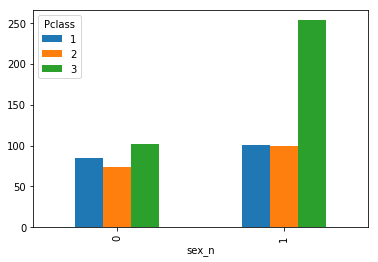

In [46]:
%matplotlib inline
pd.crosstab(inputs.sex_n,inputs.Pclass).plot(kind='bar')

In [35]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(inputs,target,test_size=0.3)

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
model.score(X_test,y_test)

0.7441860465116279

In [54]:
model.predict([[1,38,71.92,0]])

array([1], dtype=int64)

In [60]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[95, 24],
       [31, 65]], dtype=int64)

Text(24.0, 0.5, 'Truth')

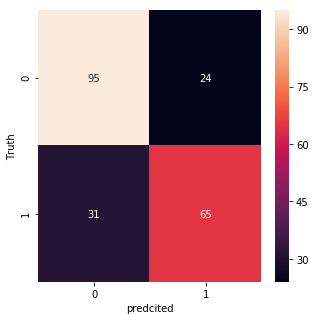

In [61]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predcited')
plt.ylabel('Truth')